In [1]:
%matplotlib inline
import sympy as sym
import pylab as pl
import numpy as np
import numpy.polynomial.polynomial as n_poly
import numpy.polynomial.legendre as leg

# Mindflow

We want the best approximation (in Hilbert Spaces) of the function $f$, on the space $V = \mathrm{span}\{v_i\}$. Remember that $p\in V$ is best approximation of $f$ if and only if:

$$
(p-f,q)=0, \quad \forall q\in V.
$$

Focus one second on the fact that both $p$ and $q$ belong to $V$. We know that any $q$ can be expressed as a linear combination of the basis functions $v_i$:

$$
(p-f,v_i)=0, \quad \forall v_i\in V.
$$

Moreover $p$ is uniquely defined by the coefficients $p^j$ such that $p = p^j\,v_j$. Collecting this information together we get:

$$
(v_j,v_i) p^j = (f,v_i),\quad \forall v_i\in V.
$$

Now that we know our goal (finding these $p^j$ coefficients) we do what the rangers do: we explore!

We understand that we will need to invert the matrix:

$$
M_{ij} = (v_j,v_i) = \int v_i\cdot v_j
$$

What happens if we choose basis functions such that $(v_j,v_i) =  \delta_{ij}$?

How to construct numerical techniques to evaluate integrals in an efficient way?

Evaluate the $L^2$ projection.

## Orthogonal Polynomials

Grham Schmidt

$$
p_0(x) = 1, \qquad p_k(x) = x^k - \sum_{j=0}^{k-1} \frac{(x^k,p_j(x))}{(p_j(x),p_j(x))}
$$

or, alternatively

$$
p_0(x) = 1, \qquad p_k(x) = x\,p_{k-1}(x) - \sum_{j=0}^{k-1} \frac{(x p_{k-1}(x),p_j(x))}{(p_j(x),p_j(x))}
$$

In [13]:
def scalar_prod(p0,p1,a=0,b=1):
    # insert some assertions later
    return sym.integrate(p0*p1,(t,a,b))

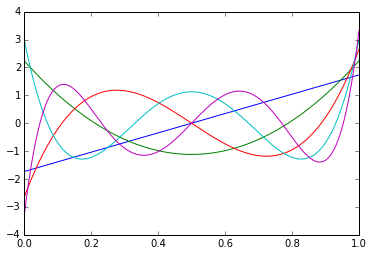

In [74]:
# Assign a symbolic variable
t = sym.symbols('t') 
p0 = t
p1 = t**2
# perform integration
# scalar_prod(p0,p1)
Pd = [1+0*t]

# Constructing the Gramm-Schmidt Orthonormalization
N = 6
for k in range(1,N):
    s = 0
    for j in range(k):
        s += scalar_prod(t**k,Pd[j]) / scalar_prod(Pd[j],Pd[j]) * Pd[j]
    pd = t**k - s
    pd = pd / sym.sqrt(scalar_prod(pd,pd))
    Pd.append(pd)

M = sym.Matrix([[scalar_prod(Pd[i],Pd[j]) for j in range(len(Pd))] for i in range(len(Pd))])
v = sym.Matrix([t**i for i in range(len(Pd))])

x = np.linspace(0,1,1000)
for p in Pd[1:]:
    fs = sym.lambdify(t,p,'numpy')
    _ = pl.plot(x,fs(x))

[-0.5*sqrt(3)*(t - sqrt(3)/3), 0.5*sqrt(3)*(t + sqrt(3)/3)]

In [110]:

Ln

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

## Theorem

Le $q$ be nonzero polynomial of degree $n+1$ and $\omega(x)$ a positive weight function, s. t.:

$$
\int_a^b x^k q(x)\, \omega(x) = 0, \quad k = 0,\ldots, n
$$

If $x_i$ are zeros of $q(x)$, then:

$$
\int_a^b f(x)\, \omega(x)\approx \sum_{i=0}^nw_i\, f(x_i)
$$

with:

$$
w_i = \int_a^b l_i(x)\, \omega(x)
$$

is exact for all polynomials of degree at most $2n+1$. Here $l_i(x)$ are the usual Lagrange interpolation polynomials.

**Proof:** assume $f(x)$ is a polynomial of degree at most $2n+1$ and show:
$$
\int_a^b f(x)\, \omega(x) = \sum_{i=0}^nw_i\, f(x_i).
$$
Usign the polynomial division we have:
$$
\underbrace{f(x)}_{2n+1} = \underbrace{q(x)}_{n+1}\, \underbrace{p(x)}_{n} + \underbrace{r(x)}_{n}.
$$
By taking $x_i$ as zeros of $q(x)$ we have:
$$
f(x_i) = r(x_i)
$$
Now:
$$
\int_a^b f(x)\, \omega(x) = \int_a^b [q(x)\, p(x) + r(x)]\, \omega(x)
$$
$$
 = \underbrace{\int_a^b q(x)\, p(x) \, \omega(x)}_{=0} + \int_a^b r(x)\, \omega(x)
$$
Since $r(x)$ is a polynomial of order $n$ this is exact:

$$
\int_a^b f(x)\, \omega(x) = \int_a^b r(x)\, \omega(x) = \sum_{i=0}^nw_i\, r(x_i)
$$

But since we chose $x_i$ such that $f(x_i) = r(x_i)$, we have:

$$
\int_a^b f(x)\, \omega(x) = \int_a^b r(x)\, \omega(x) = \sum_{i=0}^nw_i\, f(x_i) 
$$

This completes the proof.

## Legendre Polynomial

Two term recursion, to obtain the same orthogonal polynomials above (defined between [-1,1]), normalized to be one in $x=1$:

$$
(n+1) p^{n+1}(x) = (2n+1)\, x\, p^n(x) - n\, p^{n-1}(x)
$$

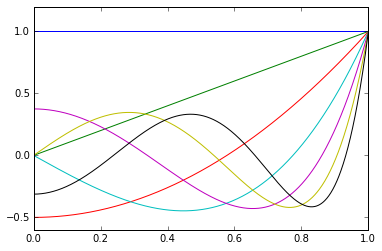

In [95]:
Pk = [t/t,t]
N = 6
for n in range(1,N):
    pk = ((2*n+1)*t*(Pk[n]) - n*(Pk[n-1]))/(n+1)
    Pk.append(pk)

Pk = sym.simplify(Pk)
x = np.linspace(0,1,1000)
for p in Pk:
    fs = sym.lambdify(t,p,'numpy')
    _ = pl.plot(x,[fs(x) for x in x])

In our proof we selected to evaluate $x_i$ at the zeros of the legendre polynomials, this is why we need to evaluate the zeros of the polynomials.

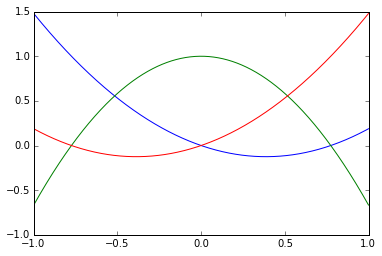

In [137]:
nn = 3
p = sym.poly(Pk[nn])
# print(Pk[nn],type(Pk[nn]))
# print(p,type(p))
# print(p.real_roots())
# print(p.nroots())

q = p.real_roots()
Ln = [1. for i in range(len(q))]

x = np.linspace(-1,1,1000)
for i in range(len(q)):
    for j in range(len(q)):
        if i!=j:
            Ln[i] *= (t-q[j])/(q[i]-q[j])
    Lnf = sym.lambdify(t,Ln[i],'numpy')
    _ = pl.plot(x,Lnf(x))

$$
w_i = \int_{-1}^{1} l_i(x)
$$

In [138]:
wi = [scalar_prod(Ln[i],1,-1,1) for i in range(len(Ln))]
wi #Gauss quadrature

[0.555555555555555, 0.888888888888889, 0.555555555555555]

### Hint
Proiezione usando polinomi LEGENDRE (f,v_i)

# Now let's get Numerical

From now on I work on the $[0,1]$ interval, becouse i like it this way :)



In the previus section we explored what sympbolically was happening, now we implement things on the computer. We saw how important are the legendre plynomials. Here a little documentation on that. I pont it out not because you need to read it all, but because I would like you get some aquitance with this criptic documentation pages [doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.legendre.legroots.html#numpy.polynomial.legendre.legroots).

The problem we aim at solving is finding the coefficents $p_j$ such that:
$$
(v_j,v_i) p^j = (f,v_i),\quad \forall v_i\in V.
$$
Remind in this section the einstein notation holds.

We can expand the compact scalar product notation:
$$
p^j \int_0^1 v_i\, v_j = \int_0^1 f\, v_i,\quad \forall v_i\in V.
$$

We consider $V = \mathrm{span}\{l_i\}$. Our problem becomes:
$$
p^j \int_0^1 l_i\, l_j = \int_0^1 f\, l_i,\quad \mathrm{for}\ i = 0,\ldots,\mathtt{deg}
$$
Let's focus on mass matrix:
$$
\int_0^1 l_i(x)\, l_j(x) = \sum_k l_i(x_k)\, w_k\, l_j(x_k) = 
$$

$$
=
\left(
\begin{array}{c c c c}
l_0(x_0) & l_0(x_1) & \ldots & l_0(x_q) \\
l_1(x_0) & l_1(x_1) & \ldots & l_1(x_q) \\
 & \ldots & \ldots  & \\
l_n(x_0) & l_n(x_1) & \ldots & l_n(x_q) \\
\end{array}
\right)
\left(
\begin{array}{c c c c}
w_0 &   0 & \ldots & 0 \\
  0 & w_1 & \ldots & 0 \\
   & \ldots & \ldots  & \\
  0 &   0 & \ldots & w_q \\
\end{array}
\right)
\left(
\begin{array}{c c c c}
l_0(x_0) & l_1(x_0) & \ldots & l_n(x_0) \\
l_0(x_1) & l_1(x_1) & \ldots & l_n(x_1) \\
 & \ldots & \ldots  & \\
l_0(x_q) & l_1(x_q) & \ldots & l_n(x_q) \\
\end{array}
\right)
= B\, W\, B^T
$$

A piece of curiosity, how the the two functions to find theros in two different ways

In [142]:
N = 3
coeffs = np.zeros(N)
coeffs[-1] = 1
leg.legroots(coeffs)

array([-0.57735027,  0.57735027])

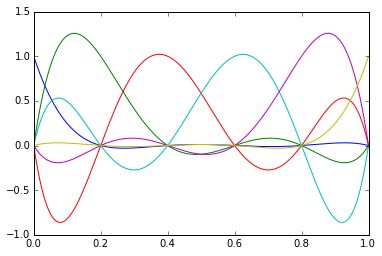

In [206]:
def lg_set(q):
    '''returns the set of basis functions'''
    n = q.shape[0]
    L = [ n_poly.Polynomial.fromroots([xj for xj in q if xj != q[i]]) for i in range(n) ]
    L = [L[i]/L[i](q[i]) for i in range(n)]
    return L



differenza fra le roots "simboliche" e non

Recall:
$$
B\, W\, B^T p = B W f
$$

$$
B\, W\, B^T = 
\left(
\begin{array}{c c c c}
l_0(x_0) & l_0(x_1) & \ldots & l_0(x_q) \\
l_1(x_0) & l_1(x_1) & \ldots & l_1(x_q) \\
 &  & \ddots  & \\
l_n(x_0) & l_n(x_1) & \ldots & l_n(x_q) \\
\end{array}
\right)
\left(
\begin{array}{c c c c}
w_0 &   0 & \ldots & 0 \\
  0 & w_1 & \ldots & 0 \\
   &  & \ddots  & \\
  0 &   0 & \ldots & w_q \\
\end{array}
\right)
\left(
\begin{array}{c c c c}
l_0(x_0) & l_1(x_0) & \ldots & l_n(x_0) \\
l_0(x_1) & l_1(x_1) & \ldots & l_n(x_1) \\
 & & \ddots  & \\
l_0(x_q) & l_1(x_q) & \ldots & l_n(x_q) \\
\end{array}
\right)
$$

23.648427957730998

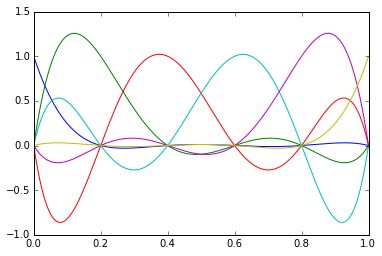

In [216]:
deg = 5
int_p = np.linspace(0,1,deg+1)
L = lg_set(int_p)

x = np.linspace(0,1,1000)
for p in L:
    _ = pl.plot(x,p(x))


Nq = deg+1
p,w = leg.leggauss(Nq)
p = (p+1)*0.5
w = w*0.5

B = np.zeros((0,Nq))
for l in L:
    B = np.vstack([B,l(p)])
W = np.diag(w)
M = B.dot(W.dot(B.T)) #mass matrix
np.linalg.cond(M)

$$
B\, W\, f = 
\left(
\begin{array}{c c c c}
l_0(x_0) & l_0(x_1) & \ldots & l_0(x_q) \\
l_1(x_0) & l_1(x_1) & \ldots & l_1(x_q) \\
 & \ldots & \ldots  & \\
l_n(x_0) & l_n(x_1) & \ldots & l_n(x_q) \\
\end{array}
\right)
\left(
\begin{array}{c c c c}
w_0 &   0 & \ldots & 0 \\
  0 & w_1 & \ldots & 0 \\
   & \ldots & \ldots  & \\
  0 &   0 & \ldots & w_q \\
\end{array}
\right)
\left(
\begin{array}{c}
f(x_0) \\
f(x_1) \\
\vdots\\
f(x_q) \\
\end{array}
\right)
$$

In [214]:
f = lambda x: np.sin(2*np.pi*x)
g = B.dot(W.dot(f(p)))

p = np.linalg.solve(M,g)


In [204]:
p

array([ 0.02982773,  0.95443006,  0.58723372, -0.58723372, -0.95443006,
       -0.02982773])

In [205]:
def get_interpolating_function(LL,ui):
    def func(LL,ui,x):
        acc = 0
        for L,u in zip(LL,ui):
            #print(L,u)
            acc+=u*L(x)
        return acc
    return lambda x : func(LL,ui,x)

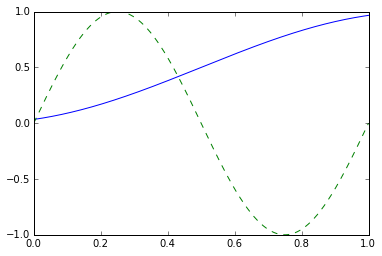

In [213]:
I = get_interpolating_function(L,p)
_ = pl.plot(x,I(x))
_ = pl.plot(x,f(x),'--')